In [10]:
import os 
import pandas as pd
import numpy as np
import pickle 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [11]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


<h1> Training ML <h1>

In [12]:
mapping_label =['Bronchiectasis','Bronchiolitis', 'LRTI', 'Pneumonia','URTI']

In [13]:
with open('../../data/data_model/data_dict.pkl','rb') as f:
    data = pickle.load(f)

In [171]:
df.filename = df.filename.apply(lambda x :x. split('/')[-1])
df.filename = df.filename.apply(lambda x :x. split('.')[0])

In [172]:
df = df.merge(df_info,on='filename',how='inner')
df = df.drop(columns = ['Age','Sex','train_test_split','label','Participant_ID','filename','Adult BMI (kg/m2)','Child Weight (kg)','Child Height (cm)','wheeze','crackle'])

In [173]:
df.columns = df.columns.str.replace('delta-mfcc','m1fcc')
df.columns = df.columns.str.replace('delta2-mfcc','m2fcc')

In [174]:
df.Outcome.value_counts()

COPD                     793
Respiratory_infection     91
Healthy                   35
Name: Outcome, dtype: int64

In [175]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
X=df.drop('Outcome', axis=1)
y = df.Outcome

In [176]:
clf = RandomForestClassifier(n_estimators = 500, 
    max_depth=2,
    class_weight = 'balanced', 
    random_state=0
    )

In [177]:
list_feat = [col for col in X.columns if 'o-mfcc' in col]
len(list_feat)

0

In [179]:
list_feature_type= ['rmse', 'chroma_stft','spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate','mfcc','m1fcc','m2fcc']
result = []
for col_feat in list_feature_type:
    list_feat = [col for col in X.columns if col_feat not in col]
    X_feat = X[list_feat].copy()
    print(col_feat, X_feat.shape)
    
    cv =  skf.split(X_feat, y)
    originalclass = []
    predictedclass = []
    score = cross_val_score(clf, X=X_feat, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))
    
    c = classification_report(originalclass, predictedclass)
    print(c) 

rmse (919, 65)
                       precision    recall  f1-score   support

                 COPD       0.98      0.93      0.96       793
              Healthy       0.41      0.57      0.48        35
Respiratory_infection       0.50      0.63      0.55        91

             accuracy                           0.89       919
            macro avg       0.63      0.71      0.66       919
         weighted avg       0.91      0.89      0.90       919

chroma_stft (919, 65)
                       precision    recall  f1-score   support

                 COPD       0.98      0.94      0.96       793
              Healthy       0.35      0.51      0.42        35
Respiratory_infection       0.50      0.60      0.55        91

             accuracy                           0.89       919
            macro avg       0.61      0.69      0.64       919
         weighted avg       0.91      0.89      0.90       919

spectral_centroid (919, 65)
                       precision    recall  f1-

In [182]:
col_feat = 'mfcc'
list_feat = [col for col in X.columns if col_feat in col]
X_feat = X[list_feat].copy()
print(col_feat, X_feat.shape)

cv =  skf.split(X_feat, y)
originalclass = []
predictedclass = []
score = cross_val_score(clf, X=X_feat, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

c = classification_report(originalclass, predictedclass)
print(c)

mfcc (919, 20)
                       precision    recall  f1-score   support

                 COPD       0.98      0.78      0.87       793
              Healthy       0.19      0.46      0.26        35
Respiratory_infection       0.31      0.69      0.43        91

             accuracy                           0.76       919
            macro avg       0.49      0.64      0.52       919
         weighted avg       0.89      0.76      0.80       919



In [183]:
col_feat = 'm2fcc'
list_feat = [col for col in X.columns if col_feat in col]
X_feat = X[list_feat].copy()
print(col_feat, X_feat.shape)

cv =  skf.split(X_feat, y)
originalclass = []
predictedclass = []
score = cross_val_score(clf, X=X_feat, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

c = classification_report(originalclass, predictedclass)
print(c)

m2fcc (919, 20)
                       precision    recall  f1-score   support

                 COPD       0.97      0.94      0.95       793
              Healthy       0.25      0.49      0.33        35
Respiratory_infection       0.45      0.44      0.45        91

             accuracy                           0.87       919
            macro avg       0.56      0.62      0.58       919
         weighted avg       0.89      0.87      0.88       919



In [184]:
col_feat = 'm1fcc'
list_feat = [col for col in X.columns if col_feat in col]
X_feat = X[list_feat].copy()
print(col_feat, X_feat.shape)

cv =  skf.split(X_feat, y)
originalclass = []
predictedclass = []
score = cross_val_score(clf, X=X_feat, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

c = classification_report(originalclass, predictedclass)
print(c)

m1fcc (919, 20)
                       precision    recall  f1-score   support

                 COPD       0.97      0.83      0.89       793
              Healthy       0.15      0.20      0.17        35
Respiratory_infection       0.30      0.64      0.41        91

             accuracy                           0.78       919
            macro avg       0.47      0.55      0.49       919
         weighted avg       0.87      0.78      0.82       919



In [185]:
cv =  skf.split(X_feat, y)
originalclass = []
predictedclass = []
score = cross_val_score(clf, X=X, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

c = classification_report(originalclass, predictedclass)
print(c)

                       precision    recall  f1-score   support

                 COPD       0.98      0.94      0.96       793
              Healthy       0.40      0.54      0.46        35
Respiratory_infection       0.51      0.64      0.57        91

             accuracy                           0.89       919
            macro avg       0.63      0.71      0.66       919
         weighted avg       0.91      0.89      0.90       919



In [190]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
 
x = confusion_matrix(originalclass, predictedclass)

<AxesSubplot: >

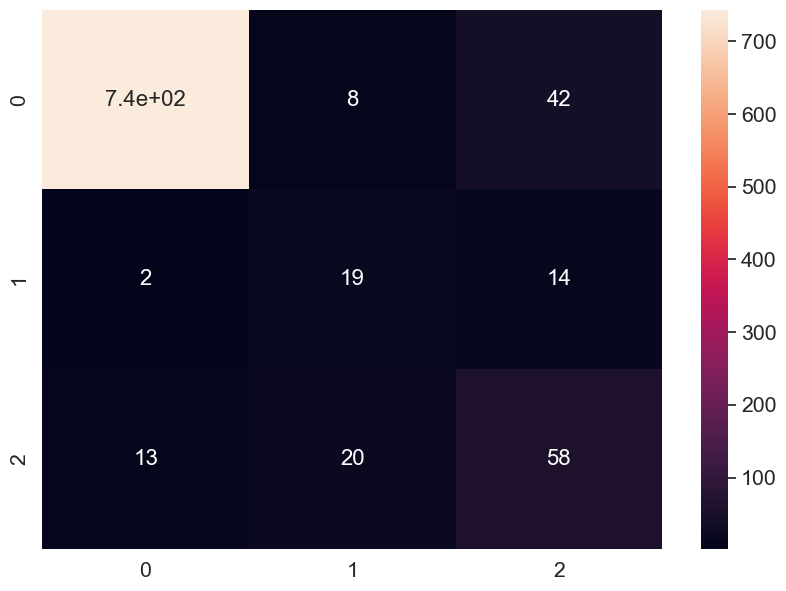

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(x, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size